在使用scikit-learn 中使用**LinearRegression**进行线性回归，可以指定**normalize=True**来对数据归一化处理

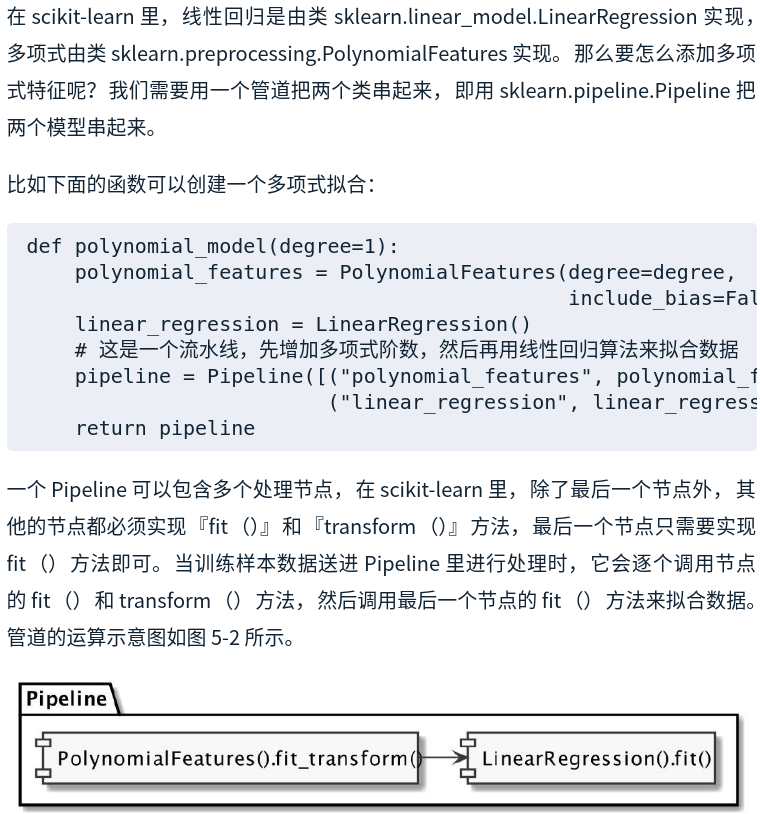

### 使用线性回归拟合正弦函数

In [1]:
import numpy as np

In [30]:
n_dots = 200
X = np.linspace(-6*np.pi,6*np.pi,n_dots)
Y = np.sin(X) + 0.2*np.random.rand(n_dots) -.1
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [18]:
def polynormial_model(degree=1):
    polynormial_features = PolynomialFeatures(degree=degree,
                                              include_bias=False)
    linear_regression = LinearRegression(normalize=True)
    pipeline = Pipeline([('polynomial_features',polynormial_features),
                        ('linear_regression',linear_regression)])
    return pipeline

In [19]:
from sklearn.metrics import mean_squared_error

In [34]:
degrees = [2,3,5,10,20]
results = []
for d in degrees:
    model = polynormial_model(degree=d)
    model.fit(X,Y)
    train_score = model.score(X,Y)
    mse = mean_squared_error(Y,model.predict(X))
    results.append({'model':model,'degree':d,'score':train_score,'mse':mse})
for r in results:
    print("degree:{} score:{} mse:{}".format(r['degree'],r['score'],r['mse']))

degree:2 score:0.0169599076368544 mse:0.49026867135405966
degree:3 score:0.049260745097531644 mse:0.4741593704328724
degree:5 score:0.07505551629333507 mse:0.461294820654798
degree:10 score:0.160621935072047 mse:0.4186205342517698
degree:20 score:0.9758274709964099 mse:0.012055493738173731


In [35]:
import matplotlib.pyplot as plt
from matplotlib.figure import SubplotParams #调整子图间的竖间距

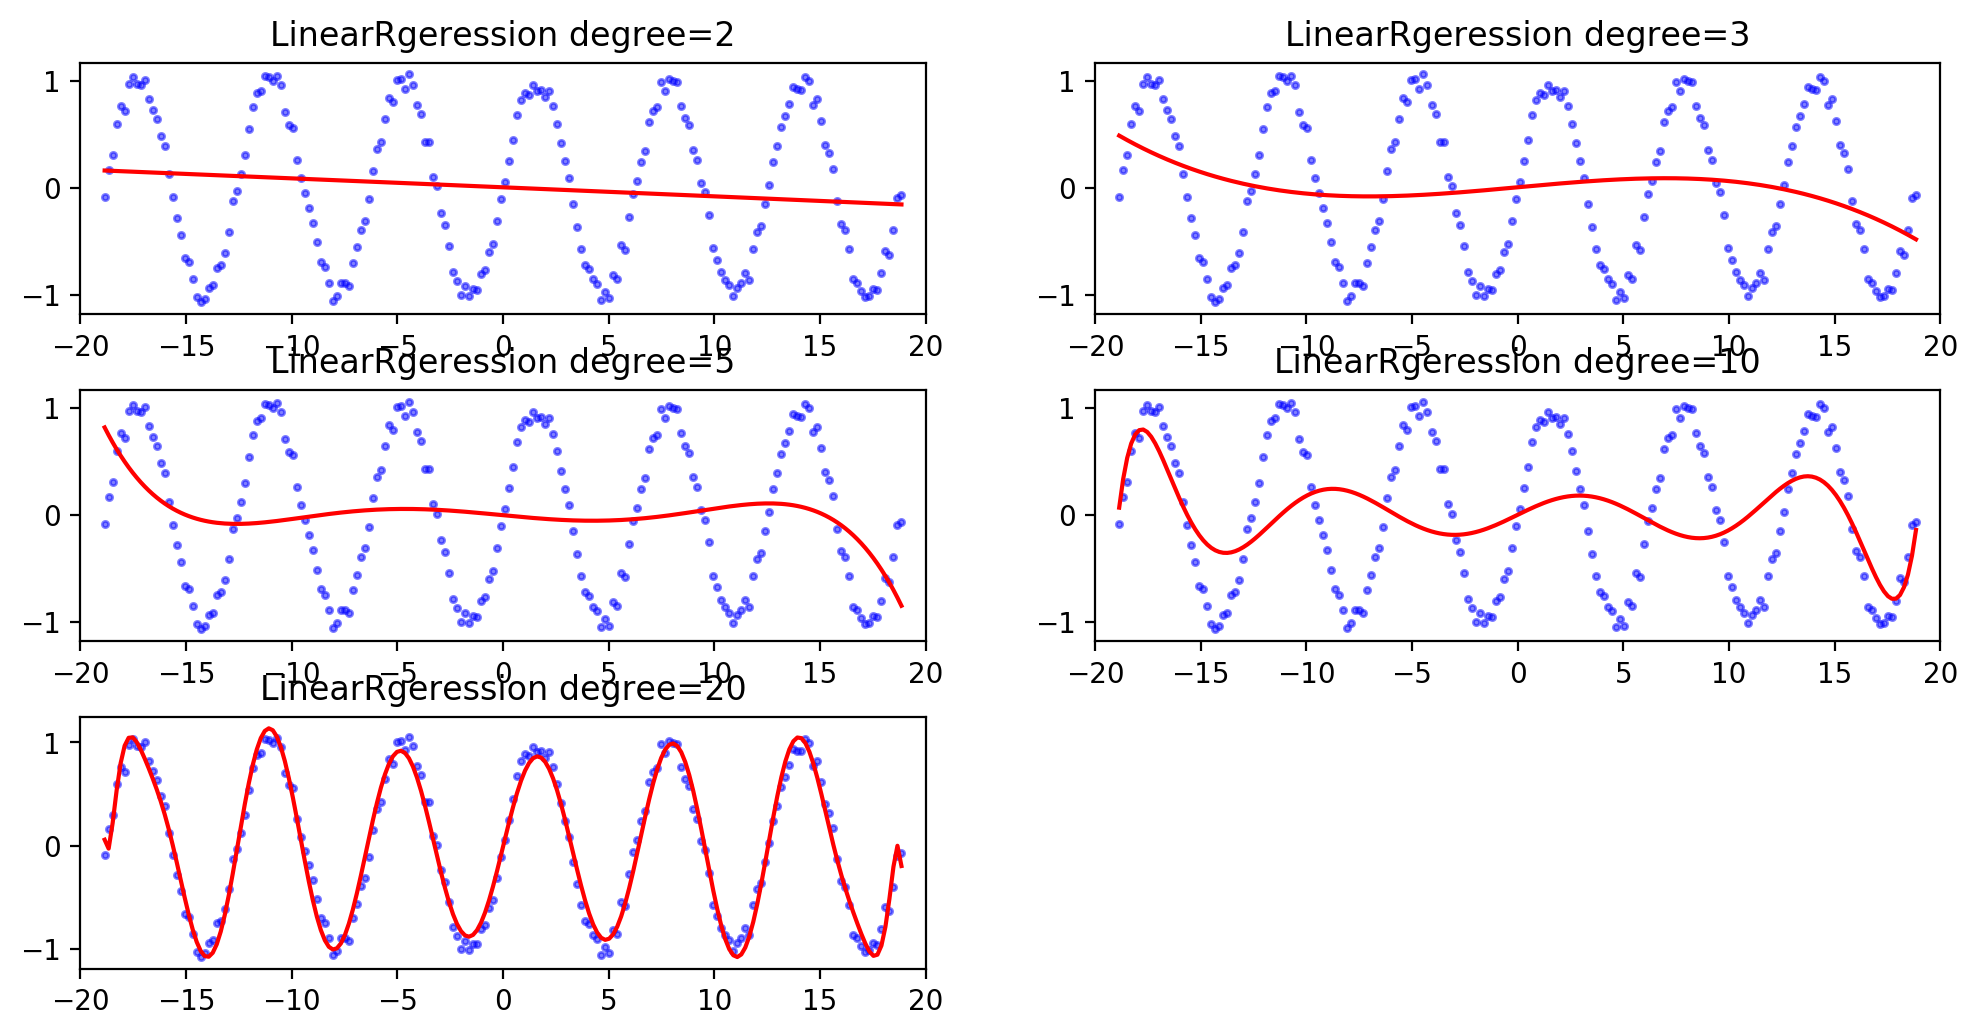

In [38]:
plt.figure(figsize=(12,6),dpi=200,subplotpars = SubplotParams(hspace=0.3))
for i,r in enumerate(results):
    fig = plt.subplot(3,2,i+1)
    plt.xlim(-20,20)
    plt.title("LinearRgeression degree=%d"%r['degree'])
    plt.scatter(X,Y,s=5,c='b',alpha=0.5)
    plt.plot(X,r['model'].predict(X),'r-')

### 预测房价

In [39]:
from sklearn.datasets import load_boston  #导入数据

In [40]:
boston = load_boston()
X = boston.data
y = boston.target
X.shape

(506, 13)

In [51]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [54]:
X_train.shape

(404, 13)

In [84]:
import time
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)

start = time.clock()
model.fit(X_train,y_train)

train_score = model.score(X_train,y_train)
cv_score = model.score(X_test,y_test)
print('elaspe:{0:.6f} train_score:{1:.6f}; cv_score:{2:.6f}'.format\
     (time.clock()-start,train_score,cv_score))

elaspe:0.004737 train_score:0.723941; cv_score:0.794958


In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [96]:
def polynomial_model(degree=1):
    polynomial_features = PolynomialFeatures(degree=degree,
                                            include_bias=False)
    linear_regression = LinearRegression(normalize=True)
    
    pipeline=pipeline([('polynomial_features',polynomial_features),
                      ('linear_regression',linear_regression)])
    
    return pipeline

In [104]:
#使用二项式来拟合数据
model = polynormial_model(degree=2)
start = time.clock()
model.fit(X_train,y_train)

train_score = model.score(X_train,y_train)
cv_score = model.score(X_test,y_test)
print('elaspe:{0:.6f} train_score:{1:.6f}; cv_score:{2:.6f}'.format\
     (time.clock()-start,train_score,cv_score))

elaspe:0.019338 train_score:0.930547; cv_score:0.860465


In [105]:
from sklearn.model_selection import ShuffleSplit